In [156]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import itemfreq
import matplotlib.gridspec as gridspec

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.convolutional import Convolution2D

In [2]:
gif = Image.open('simple.gif')

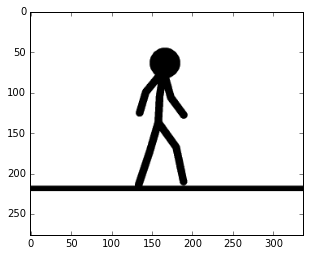

In [136]:
plt.imshow(gif)

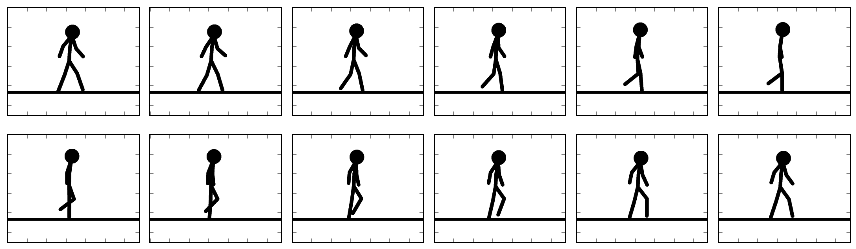

In [135]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12,4))

for i, ax in enumerate(axes.flat):
    gif.seek(i)
    im = np.array(gif.convert('L'))
    im = im / (1.0 * im.max())
    ax.imshow(im, cmap=cm.gray)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [137]:
im.shape

(276, 337)

In [162]:
data = np.ndarray((12, 1, 276, 337))
for i in range(12):
    gif.seek(i)
    im = np.array(gif.convert('L'))
    im = 1 - im / (1.0 * im.max())
    data[i] = im

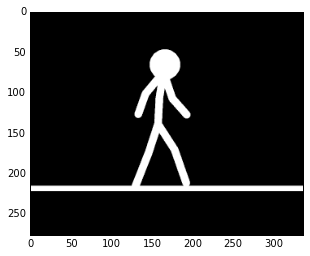

In [165]:
plt.imshow(data[0][0], cmap=cm.gray)

In [161]:
im.shape

(276, 337)

In [170]:
model = Sequential()
model.add(Convolution2D(10, 5, 5, input_shape=(1, 276, 337)))
model.add(LSTM(output_dim=(1, 276, 337)))

Exception: Input 0 is incompatible with layer lstm_3: expected ndim=3, found ndim=4